<a href="https://colab.research.google.com/github/aartivjadhav/machine_learning/blob/main/covid_19_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])

In [ ]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0.0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0.0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0.0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0.0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0.0,Africa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31891 entries, 0 to 31890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  9535 non-null   object        
 1   Country/Region  31891 non-null  object        
 2   Lat             31891 non-null  float64       
 3   Long            31891 non-null  float64       
 4   Date            31891 non-null  datetime64[ns]
 5   Confirmed       31891 non-null  int64         
 6   Deaths          31891 non-null  int64         
 7   Recovered       31891 non-null  int64         
 8   Active          31890 non-null  float64       
 9   WHO Region      31890 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 2.4+ MB


In [ ]:
data['Date'].value_counts()

2020-01-22    261
2020-04-23    261
2020-04-21    261
2020-04-20    261
2020-04-19    261
             ... 
2020-02-27    261
2020-02-26    261
2020-02-25    261
2020-02-24    261
2020-05-23     49
Name: Date, Length: 123, dtype: int64

In [ ]:
# to find the case on the last day
top = data[data['Date']==data['Date'].max()]
top

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
31842,NaN,Afghanistan,33.939110,67.709953,2020-05-23,9998,216,1040,8742.0,Eastern Mediterranean
31843,NaN,Albania,41.153300,20.168300,2020-05-23,989,31,783,175.0,Europe
31844,NaN,Algeria,28.033900,1.659600,2020-05-23,8113,592,4426,3095.0,Africa
31845,NaN,Andorra,42.506300,1.521800,2020-05-23,762,51,653,58.0,Europe
31846,NaN,Angola,-11.202700,17.873900,2020-05-23,61,4,18,39.0,Africa
31847,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-05-23,25,3,19,3.0,Americas
31848,NaN,Argentina,-38.416100,-63.616700,2020-05-23,11353,445,3530,7378.0,Americas
31849,NaN,Armenia,40.069100,45.038200,2020-05-23,6302,77,2936,3289.0,Europe
31850,Australian Capital Territory,Australia,-35.473500,149.012400,2020-05-23,107,3,104,0.0,Western Pacific
31851,New South Wales,Australia,-33.868800,151.209300,2020-05-23,3087,48,2653,386.0,Western Pacific


In [ ]:
country_group = top.groupby('Country/Region')['Confirmed','Active','Deaths'].sum().reset_index()

In [ ]:
country_group

,Country/Region,Confirmed,Active,Deaths
0,Afghanistan,9998,8742.0,216
1,Albania,989,175.0,31
2,Algeria,8113,3095.0,592
3,Andorra,762,58.0,51
4,Angola,61,39.0,4
5,Antigua and Barbuda,25,3.0,3
6,Argentina,11353,7378.0,445
7,Armenia,6302,3289.0,77
8,Australia,7114,504.0,102
9,Austria,16486,810.0,639


In [ ]:
fig = px.choropleth(country_group,locations='Country/Region',locationmode='country names',color='Active',hover_name='Country/Region',
                    range_color=[1,1500],color_continuous_scale='pinkyl',title='Active cases in countries')
fig.show()

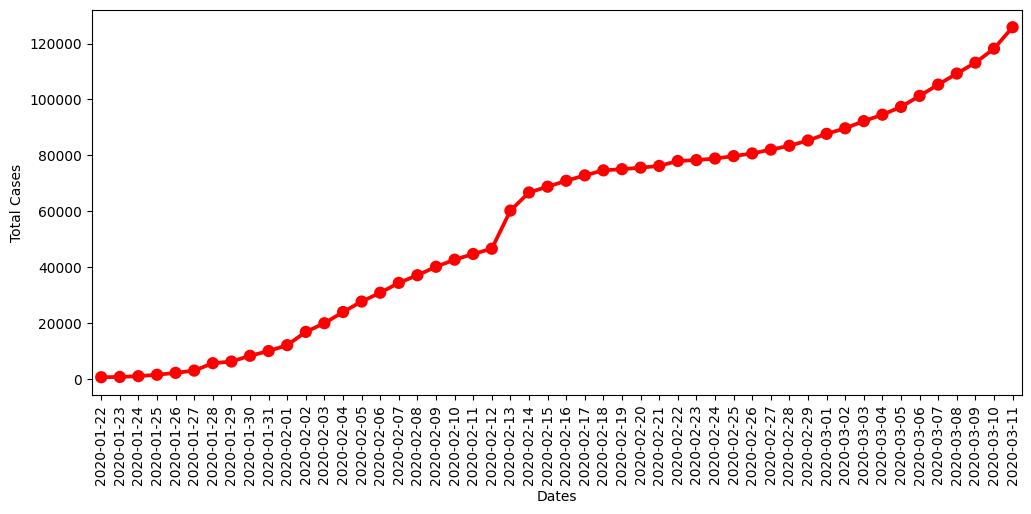

In [ ]:
# plot for confirmed cases
plt.figure(figsize=(12,5))

t_cases = data.groupby('Date')['Confirmed'].sum().reset_index()
t_cases['Date'] = t_cases['Date'].dt.date    #taking only date part and not the time part

a= sns.pointplot(x=t_cases.Date.head(50),y=t_cases.Confirmed.head(50),color='r')
a.set(xlabel='Dates',ylabel='Total Cases')

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# from the point plot we can see that rate of confirmed cases is increasing

In [ ]:
# getting the top 20 countries
top

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
31842,NaN,Afghanistan,33.939110,67.709953,2020-05-23,9998,216,1040,8742.0,Eastern Mediterranean
31843,NaN,Albania,41.153300,20.168300,2020-05-23,989,31,783,175.0,Europe
31844,NaN,Algeria,28.033900,1.659600,2020-05-23,8113,592,4426,3095.0,Africa
31845,NaN,Andorra,42.506300,1.521800,2020-05-23,762,51,653,58.0,Europe
31846,NaN,Angola,-11.202700,17.873900,2020-05-23,61,4,18,39.0,Africa
31847,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-05-23,25,3,19,3.0,Americas
31848,NaN,Argentina,-38.416100,-63.616700,2020-05-23,11353,445,3530,7378.0,Americas
31849,NaN,Armenia,40.069100,45.038200,2020-05-23,6302,77,2936,3289.0,Europe
31850,Australian Capital Territory,Australia,-35.473500,149.012400,2020-05-23,107,3,104,0.0,Western Pacific
31851,New South Wales,Australia,-33.868800,151.209300,2020-05-23,3087,48,2653,386.0,Western Pacific


In [ ]:
# top 20 active cases countries
top_active = top.groupby(by='Country/Region')['Active'].sum().sort_values(ascending=False).head(20).reset_index()
top_active

,Country/Region,Active
0,Brazil,182798.0
1,Canada,78656.0
2,Chile,53068.0
3,Belgium,32418.0
4,Bangladesh,25140.0
5,Belarus,21522.0
6,Afghanistan,8742.0
7,Argentina,7378.0
8,Bolivia,5066.0
9,Bahrain,4324.0


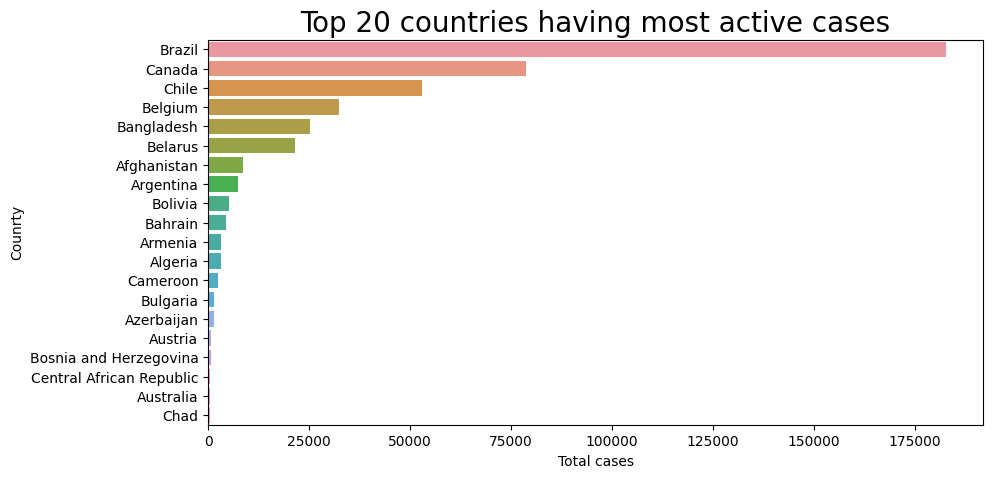

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Top 20 countries having most active cases',fontsize=20)

a=sns.barplot(x=top_active.Active,y=top_active['Country/Region'])
a.set(xlabel='Total cases',ylabel='Counrty')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
# similarly we can create the chart for death and active cases.

In [ ]:
brazil_data = data[data['Country/Region'] == 'Brazil']
brazil_data = brazil_data.groupby('Date')['Recovered','Deaths','Confirmed','Active'].sum().reset_index()
brazil_data

,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-22,0,0,0,0.0
1,2020-01-23,0,0,0,0.0
2,2020-01-24,0,0,0,0.0
3,2020-01-25,0,0,0,0.0
4,2020-01-26,0,0,0,0.0
...,...,...,...,...,...
118,2020-05-19,106794,17983,271885,147108.0
119,2020-05-20,116683,18859,291579,156037.0
120,2020-05-21,125960,20047,310087,164080.0
121,2020-05-22,135430,21048,330890,174412.0


In [ ]:
# fb prophet library - here we have to just pass the data and the seasonality is checked.
# but it can be used only for univariate time series data i.e. one dependent and one independent data

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0.0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0.0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0.0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0.0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0.0,Africa


In [ ]:
data.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510.0
2020-01-23,5594.20365,6140.869714,654,18,30,606.0
2020-01-24,5594.20365,6140.869714,941,26,36,879.0
2020-01-25,5594.20365,6140.869714,1434,42,39,1353.0
2020-01-26,5594.20365,6140.869714,2118,56,52,2010.0


In [ ]:
confirmed = data.groupby('Date')['Confirmed'].sum().reset_index()
deaths = data.groupby('Date')['Deaths'].sum().reset_index()
recovered = data.groupby('Date')['Recovered'].sum().reset_index()
confirmed.tail()

,Date,Confirmed
118,2020-05-19,4900702
119,2020-05-20,5003730
120,2020-05-21,5110064
121,2020-05-22,5216964
122,2020-05-23,730031


In [ ]:
deaths.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [ ]:
# for fb prophet the dependent column should be ds and independent should be y
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
118,2020-05-19,4900702
119,2020-05-20,5003730
120,2020-05-21,5110064
121,2020-05-22,5216964
122,2020-05-23,730031


In [ ]:
m = Prophet(interval_width=0.95) #confidence interval is 95% i.e. 5% error is acceptable
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzygqsfzu/x3599b3j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzygqsfzu/329_71bu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86657', 'data', 'file=/tmp/tmpzygqsfzu/x3599b3j.json', 'init=/tmp/tmpzygqsfzu/329_71bu.json', 'output', 'file=/tmp/tmpzygqsfzu/prophet_modeloeq52i87/prophet_model-20230709110226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:02:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:02:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=7,freq='D') #periods is how much future prediction we have to make here we are making
# prediction for next 7 days, frequency is input data is recorded daily hence 'D' and we have to make predictions on daily bases
# for next 7 days
future.tail(12)

,ds
118,2020-05-19
119,2020-05-20
120,2020-05-21
121,2020-05-22
122,2020-05-23
123,2020-05-24
124,2020-05-25
125,2020-05-26
126,2020-05-27
127,2020-05-28


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-6.104028e+04,-8.461133e+05,7.004992e+05
1,2020-01-23,-4.817854e+04,-7.288086e+05,6.789557e+05
2,2020-01-24,-3.579151e+04,-7.139679e+05,7.744032e+05
3,2020-01-25,-2.815677e+05,-1.060423e+06,4.996274e+05
4,2020-01-26,-4.831373e+04,-7.724454e+05,7.224614e+05
...,...,...,...,...
125,2020-05-26,5.046223e+06,4.351753e+06,5.823169e+06
126,2020-05-27,5.124982e+06,4.361627e+06,5.885393e+06
127,2020-05-28,5.204385e+06,4.449215e+06,5.938386e+06
128,2020-05-29,5.283312e+06,4.526940e+06,6.033537e+06


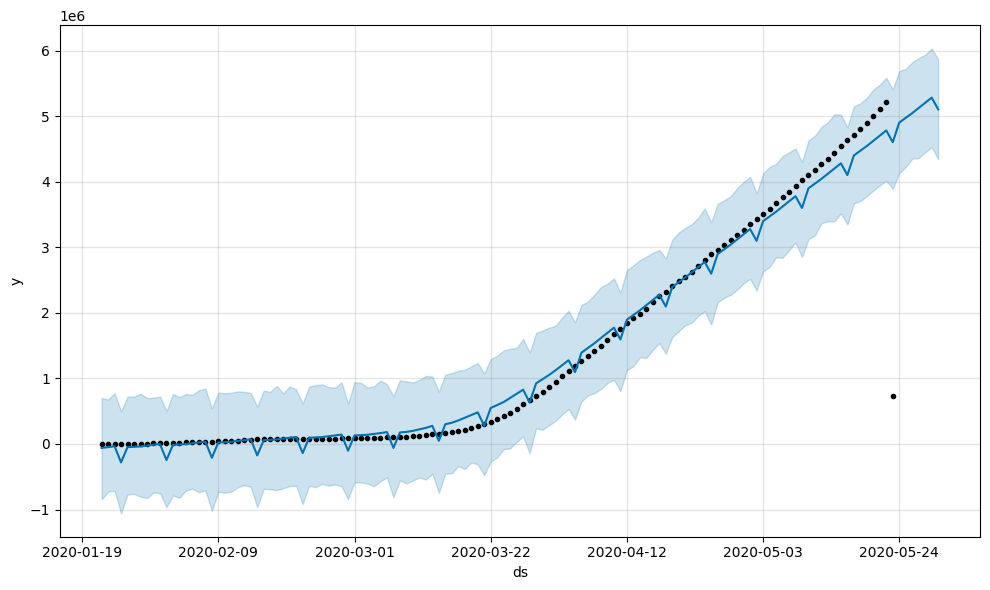

In [ ]:
confirmed_case_forecast = m.plot(forecast)
# dots are actual values and the line is predicted value the light blue band is the 5% error tolerance
# the upper tolerance value is yhat_upper and lower tolerance is yhat_lower

In [ ]:
forecast['yhat'] = forecast['yhat'].astype(int)

In [ ]:
forecast[['ds','yhat']].tail(12)

,ds,yhat
118,2020-05-19,4544822
119,2020-05-20,4623581
120,2020-05-21,4702983
121,2020-05-22,4781911
122,2020-05-23,4602676
123,2020-05-24,4902471
124,2020-05-25,4973415
125,2020-05-26,5046223
126,2020-05-27,5124982
127,2020-05-28,5204384


In [ ]:
# forecast on death cases
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [ ]:
deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
118,2020-05-19,324441
119,2020-05-20,329326
120,2020-05-21,334112
121,2020-05-22,339396


In [ ]:
m = Prophet()
m.fit(deaths)
future = m.make_future_dataframe(periods=21)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzygqsfzu/sxagers3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzygqsfzu/0r90d146.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68021', 'data', 'file=/tmp/tmpzygqsfzu/sxagers3.json', 'init=/tmp/tmpzygqsfzu/0r90d146.json', 'output', 'file=/tmp/tmpzygqsfzu/prophet_modelgaz9tk_o/prophet_model-20230709113522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:35:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:35:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
139,2020-06-09
140,2020-06-10
141,2020-06-11
142,2020-06-12
143,2020-06-13


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
139,2020-06-09,415706.775207,379805.599150,453141.010363
140,2020-06-10,421416.701562,386958.899465,457857.755672
141,2020-06-11,426712.016461,389823.201092,465707.071357
142,2020-06-12,432047.163583,393985.806335,469958.953807
143,2020-06-13,420251.250665,383726.096263,461135.518046


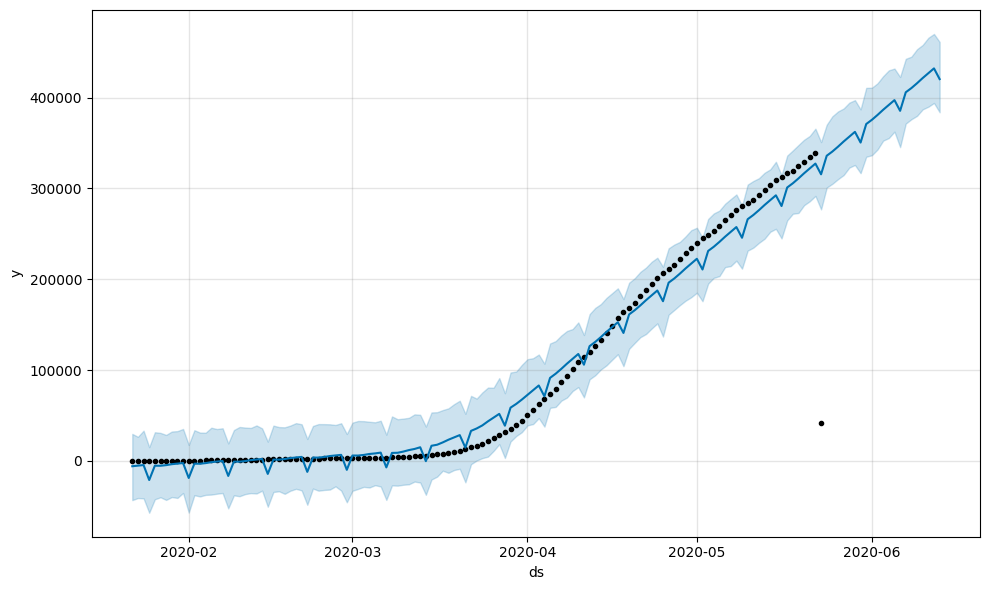

In [ ]:
deaths_forecast_plot = m.plot(forecast)

In [ ]:
forecast['yhat'] = forecast['yhat'].astype(int)

In [ ]:
forecast[['ds','yhat']].tail(25)

,ds,yhat
119,2020-05-20,316641
120,2020-05-21,321937
121,2020-05-22,327272
122,2020-05-23,315476
123,2020-05-24,335888
124,2020-05-25,340516
125,2020-05-26,345856
126,2020-05-27,351566
127,2020-05-28,356862
128,2020-05-29,362197
